In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

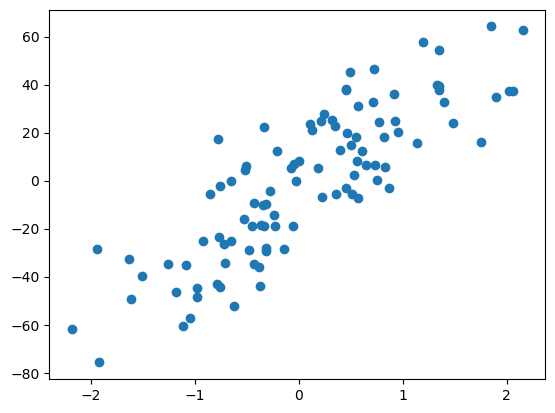

In [3]:
plt.scatter(x, y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(x_train, y_train)

LinearRegression()

In [7]:
print("m : ", lr.coef_)
print("b : ", lr.intercept_)

m :  [26.65203708]
b :  -1.8402167980671158


# self made linear_regression class

In [8]:
class MeraLinearRegression:
    def __init__(self, learning_rate, epoches):
        self.learning_rate = learning_rate
        self.epoches = epoches
        self.coef_ = 100
        self.intercept_ = 100

    def fit(self, x_train, y_train):
        for i in range(self.epoches):
            slope_intercept = -2 * np.sum(y_train - self.coef_ * x_train.ravel() - self.intercept_)
            slope_coef = -2 * np.sum((y_train - self.coef_ * x_train.ravel() - self.intercept_) * x_train.ravel())
            self.intercept_ = self.intercept_ - (self.learning_rate * slope_intercept)
            self.coef_ = self.coef_ - (self.learning_rate * slope_coef)

    def predict(self, x_test):
        return self.coef_ * x_test + self.intercept_

In [9]:
mlr = MeraLinearRegression(learning_rate = 0.004, epoches = 44)

In [10]:
mlr.fit(x_train, y_train)

In [11]:
print("lr:", lr.coef_, "\nmlr: ", mlr.coef_)

lr: [26.65203708] 
mlr:  26.65203708379797


In [12]:
print("lr:", lr.intercept_, "\nmlr: ", mlr.intercept_)

lr: -1.8402167980671158 
mlr:  -1.8402167980667914


In [13]:
y_pred = mlr.predict(x_test)

In [14]:
r2_score(y_test, y_pred)* 100

69.44377515027882

# calculating cross_val_score for more precise results

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(mlr, x, y, scoring = "r2", cv = 10)

TypeError: Cannot clone object '<__main__.MeraLinearRegression object at 0x74803da79bb0>' (type <class '__main__.MeraLinearRegression'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.